In [20]:
# Import necessary libraries
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda, ConvertImageDtype, transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

from diffusers import AutoencoderKL


In [21]:
transform = transforms.Compose([
    ToTensor(),                     # Convert image to tensor
    transforms.Pad(2, fill=0, padding_mode='constant')  # Pad the image to get 32x32 size
])

# Load and preprocess an MNIST image
def load_and_preprocess_image(index=0):
    # Load MNIST dataset
    dataset = MNIST(root='./data', download = True, transform = transform)
    # Get an image and its label
    image, label = dataset[index]
    # Convert image to float, replicate channels and add batch dimension (B, C, H, W)
    image = image.repeat(3, 1, 1).unsqueeze(0)  # Repeat the grayscale channel to simulate RGB
    return image, label

In [32]:
def display_images(original, reconstructed):
    reconstructed = torch.clamp(reconstructed, 0, 1)

    # Display original and reconstructed images side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(original.squeeze(), cmap='gray')
    axs[0].set_title("Original Image")
    axs[0].axis('off')
    axs[1].imshow(reconstructed.squeeze(), cmap='gray')
    axs[1].set_title("Reconstructed Image")
    axs[1].axis('off')
    plt.show()

In [23]:
# Load the VAE model
model_id = "stabilityai/sd-vae-ft-ema"
vae = AutoencoderKL.from_pretrained(model_id)

2


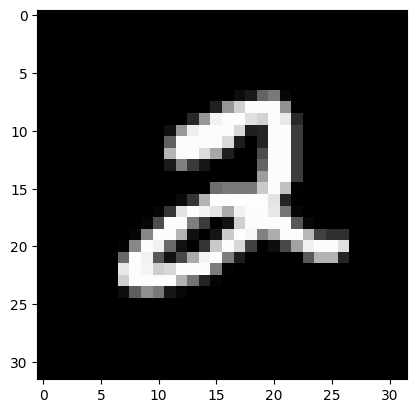

In [24]:
# Load and preprocess an MNIST image
image, label = load_and_preprocess_image(index=5)  # You can change the index to see different digits
print(label)
plt.imshow(image[0][0], cmap='gray')

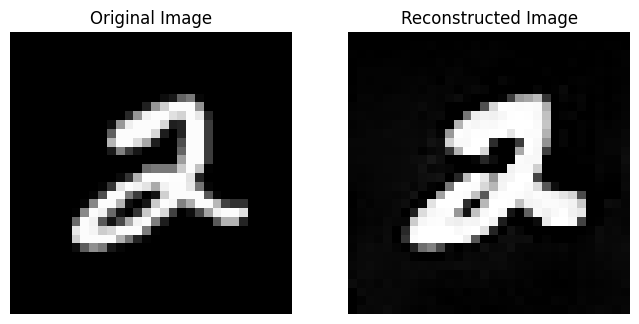

In [33]:
 with torch.no_grad():
    latent_output = vae.encode(image)
    latent = latent_output.latent_dist.mean  # Using the mean as the latent representation

    # Decode the latent representation
    reconstructed_output = vae.decode(latent)
    reconstructed_image = reconstructed_output.sample


# Display the original and reconstructed images
display_images(image[0][0], reconstructed_image[0][0])


In [35]:
reconstructed_image[0].min()

tensor(-0.6164)

In [3]:
import torch

embeddings = torch.eye(10).to('cpu')

In [15]:
torch.ones((2, 1), dtype=int)

tensor([[1],
        [1]])